In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.optimize import linear_sum_assignment

from sklearn.datasets import load_breast_cancer

In [89]:
cancer = load_breast_cancer(as_frame=True)
df = cancer.frame
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [90]:
X = df.drop(columns=['target'])
feature_names = X.columns 
y_true = df['target'].values 
K= len(np.unique(y_true))
X_scaled = StandardScaler().fit_transform(X)

print("\n\nK:\n", K,"\n\nTargets:\n 0=malignant, 1=benign \n", y_true)




K:
 2 

Targets:
 0=malignant, 1=benign 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1

In [91]:
kmeans = KMeans(n_clusters=K, random_state=42, n_init=20)
complete = AgglomerativeClustering(n_clusters=K, linkage='complete')

labels_kmeans = kmeans.fit_predict(X_scaled)
labels_complete = complete.fit_predict(X_scaled)



In [92]:
# SSE
sse_kmeans = kmeans.inertia_
sse_complete = 0.0
for i in range(K):
    cluster_points = X_scaled[labels_complete == i]
    if len(cluster_points) > 0:
        centroid = cluster_points.mean(axis=0)
        sse_complete += np.sum((cluster_points - centroid) ** 2)
        
# Accuracy
def best_accuracy(y_true, y_pred):
    n = len(np.unique(y_true))
    cost_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            cost_matrix[i, j] = -np.sum((y_true == i) & (y_pred == j))
    # print(cost_matrix)  
    # cm = confusion_matrix(y_true, y_pred) 
    # print(cm)         
    row_ind, col_ind = linear_sum_assignment(cost_matrix)
    accuracy = -cost_matrix[row_ind, col_ind].sum() / len(y_true)
    return accuracy        
            
            
acc_kmeans   = best_accuracy(y_true, labels_kmeans)
acc_complete = best_accuracy(y_true, labels_complete)            
            


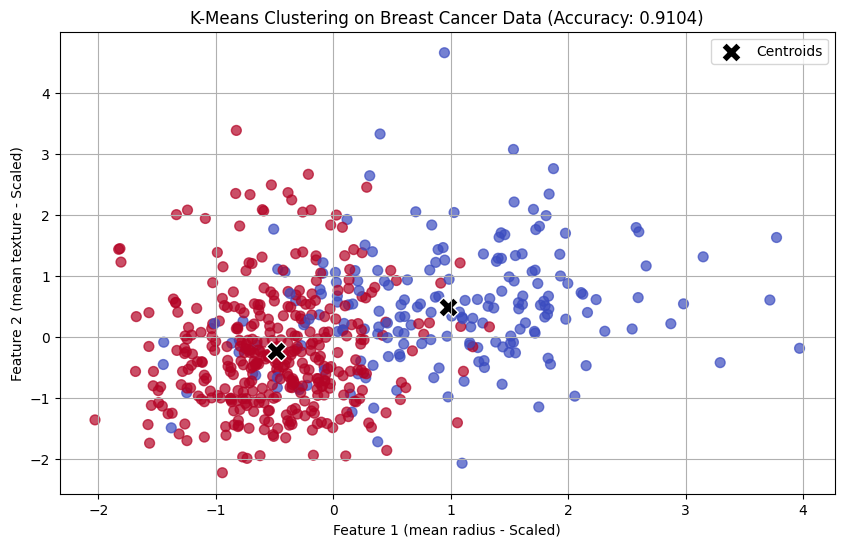

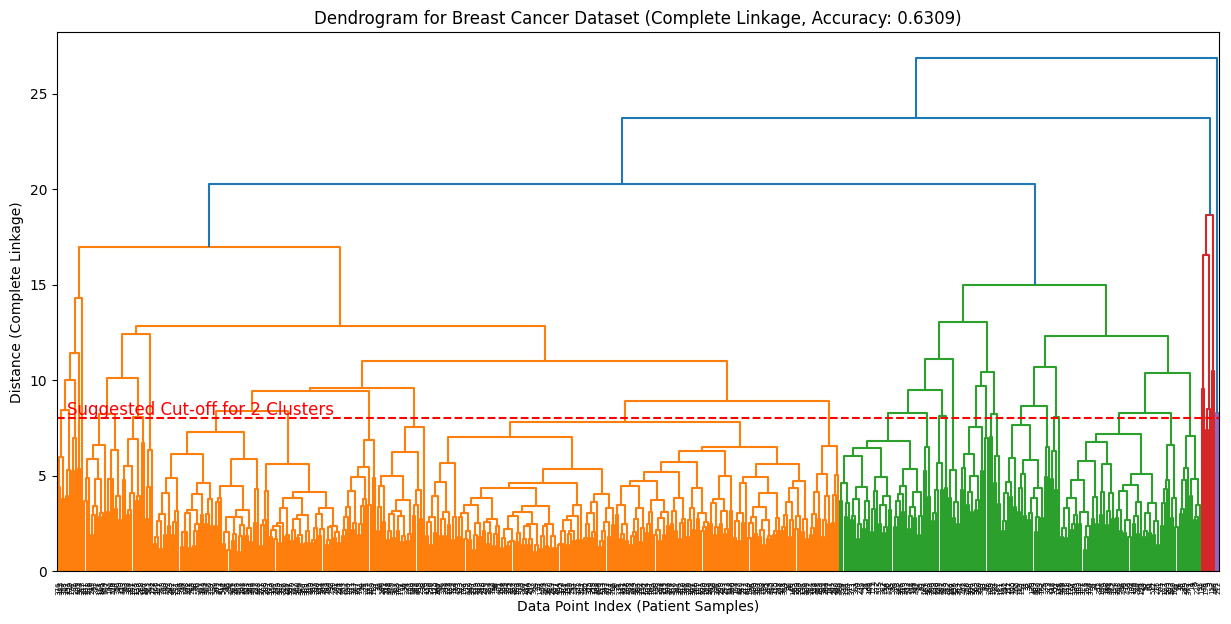

Method                    SSE              Accuracy
------------------------------------------------------------
K-Means                   11595.4615       91.0369%
Complete Linkage          16270.1882       63.0931%


In [93]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_kmeans, cmap='coolwarm', s=50, alpha=0.7)
plt.title(f'K-Means Clustering on Breast Cancer Data (Accuracy: {acc_kmeans:.4f})')
plt.xlabel(f'Feature 1 ({cancer.feature_names[0]} - Scaled)')
plt.ylabel(f'Feature 2 ({cancer.feature_names[1]} - Scaled)')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='black', label='Centroids', edgecolor='white')
plt.legend()
plt.grid(True)
plt.show()


linked_data = linkage(X_scaled, method='complete', metric='euclidean')
plt.figure(figsize=(15, 7))
dendrogram(
    linked_data,
    orientation='top',
    labels=np.array(X.index),
    distance_sort='descending',
    show_leaf_counts=False
)
plt.title(f'Dendrogram for Breast Cancer Dataset (Complete Linkage, Accuracy: {acc_complete:.4f})')
plt.xlabel('Data Point Index (Patient Samples)')
plt.ylabel('Distance (Complete Linkage)')
plt.axhline(y=8, color='r', linestyle='--')
plt.text(50, 8.2, 'Suggested Cut-off for 2 Clusters', color='red', fontsize=12)
plt.show()


       
print(f"{'Method':<20} {'SSE':>8} {'Accuracy':>21}")  
print("-"*60)
print(f"{'K-Means':<20} {sse_kmeans:15.4f} {acc_kmeans:14.4%}")     
print(f"{'Complete Linkage':<20} {sse_complete:15.4f} {acc_complete:14.4%}")
print("="*60)